# Exploratory Data Electronic Items

## Latar Belakang
Sebuah perusahaan e-commerce ingin mengetahui efisiensi strategi marketing dan sales. Terdapat sebuah database yang menunjukan detail dari data penjualan barang elektronik. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapa strategi marketing dan sales yang efisien disetiap kotanya.

## Goals 
- Penyesuaian stok barang yang perlu dikurangi dan ditambahkan
- Penyesuaian waktu yang pas untuk tim marketing membuat promo

- Penyesuaian target yang pas untuk sales menawarkan produk pada setiap kota

## Data Information

Sumber database: 
https://www.kaggle.com/beekiran/sales-data-analysis

Database yang dimiliki memiliki 11 kolom:
- Order ID : A unique ID for each order placed on a product
- Product : Item that is purchased
- Quantity Ordered : Describes how many of that products are ordered
- Price Each : Price of a unit of that product
- Order Date : Date on which the order is placed
- Purchase Address : Address to where the order is shipped
- Month, Sales, City, Hour : Extra attributes formed from the above.


### **Data Produk**

In [44]:
data = {
    "Produk":['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
    
    'Harga':[1700. , 600. , 11.95, 149.99, 3.84, 99.99, 2.99, 999.99, 14.95, 600. ,
    11.99, 150. , 400. , 700. , 109.99, 379.99, 300. , 389.99, 600.]
}

df_1 = pd.DataFrame(data).sort_values('Harga',ascending=False).reset_index()
df_1.drop(columns='index',inplace=True)
df_1

,Produk,Harga
0,Macbook Pro Laptop,1700.00
1,ThinkPad Laptop,999.99
2,iPhone,700.00
3,LG Washing Machine,600.00
4,Google Phone,600.00
5,LG Dryer,600.00
6,Vareebadd Phone,400.00
7,27in 4K Gaming Monitor,389.99
8,34in Ultrawide Monitor,379.99
9,Flatscreen TV,300.00


### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales Data-1.csv', index_col = 0)
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


## Data Anomalies
### Cek Info Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.6+ MB


### Cek tipe data

In [5]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

### Cek Missing Value

In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

Insight : Tidak ada Missing Value

### Mengubah Tipe Data yang Tidak Sesuai

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

### Cek duplicat

In [8]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
440,296081,Flatscreen TV,1,300.00,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
1735,297311,Bose SoundSport Headphones,1,99.99,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12,99.99,Los Angeles,7
2822,298358,Apple Airpods Headphones,1,150.00,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12,150.00,San Francisco,15
3131,298657,Lightning Charging Cable,1,14.95,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12,14.95,Atlanta,18
3377,298883,Wired Headphones,1,11.99,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001",12,11.99,Los Angeles,18
...,...,...,...,...,...,...,...,...,...,...
9267,218756,AAA Batteries (4-pack),1,2.99,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6,2.99,Boston,14
9538,219007,AA Batteries (4-pack),1,3.84,2019-06-24 11:16:00,"42 8th St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
10983,220392,Lightning Charging Cable,1,14.95,2019-06-08 17:13:00,"472 8th St, Portland, ME 04101",6,14.95,Portland,17
11487,220882,Lightning Charging Cable,1,14.95,2019-06-13 17:53:00,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17


### Menambahkan Feature

In [9]:
purchase_dt = df['Order Date'].dt
df['Bulan'] = purchase_dt.month_name()
df['Year'] = purchase_dt.year
df['Hari'] = purchase_dt.dayofweek
df['WeekEnd'] = df['Hari'].apply(lambda x: 'Yes' if x >= 5 else 'No')
df['Tanggal'] = purchase_dt.day

In [10]:
def waktu(x):
    if x >= 0 and x <=5:
        return 'Tengah Malam'
    elif x >= 6 and x <= 12:
        return 'Pagi'
    elif x >=13 and x <= 18:
        return 'Siang'
    elif x >=19 and x <= 24:
        return 'Malam'

df['Time'] = df['Hour'].apply(waktu)

In [11]:
def bulan(x):
    if x <=10:
        return 'Awal Bulan'
    elif x >=11 and x <= 20:
        return 'Tengah Bulan'
    elif x >=21 and x <= 31:
        return 'Akhir Bulan'
    
df['Masa'] = df['Tanggal'].apply(bulan)

In [12]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [13]:
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Order ID,int64,0,0.0,178437,"[261725, 258294]"
1,Product,object,0,0.0,19,"[20in Monitor, Google Phone]"
2,Quantity Ordered,int64,0,0.0,9,"[4, 9]"
3,Price Each,float64,0,0.0,17,"[3.84, 149.99]"
4,Order Date,datetime64[ns],0,0.0,142395,"[2019-09-11T23:20:00.000000000, 2019-04-02T12:..."
5,Purchase Address,object,0,0.0,140787,"[74 South St, Los Angeles, CA 90001, 25 Lincol..."
6,Month,int64,0,0.0,12,"[8, 5]"
7,Sales,float64,0,0.0,53,"[800.0, 389.99]"
8,City,object,0,0.0,9,"[ Dallas, Austin]"
9,Hour,int64,0,0.0,24,"[0, 19]"


### Cek Outliers Sales

In [14]:
Q1 = df.describe()['Sales']['25%']
Q1

11.95

In [15]:
Q3 = df.describe()['Sales']['75%']
Q3

150.0

In [16]:
IQR = Q3 - Q1

In [17]:
Upper_fence = Q3 + (1.5 * IQR)
Upper_fence

357.07500000000005

In [18]:
Lower_fence = Q1 - (1.5 * IQR)
Lower_fence

-195.12500000000003

In [19]:
df_outliers = df[(df['Sales'] < Lower_fence) | (df['Sales'] > Upper_fence)]

In [20]:
OS = df[df['Sales'].isin(df_outliers['Sales'])]
OS.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Bulan,Year,Hari,WeekEnd,Tanggal,Time,Masa
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,December,2019,0,No,30,Tengah Malam,Akhir Bulan
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,December,2019,6,Yes,29,Pagi,Akhir Bulan
11,295676,ThinkPad Laptop,1,999.99,2019-12-28 17:19:00,"410 Lincoln St, Los Angeles, CA 90001",12,999.99,Los Angeles,17,December,2019,5,Yes,28,Siang,Akhir Bulan
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,December,2019,2,No,25,Pagi,Akhir Bulan
27,295689,LG Washing Machine,1,600.00,2019-12-24 11:21:00,"173 Lake St, San Francisco, CA 94016",12,600.00,San Francisco,11,December,2019,1,No,24,Pagi,Akhir Bulan


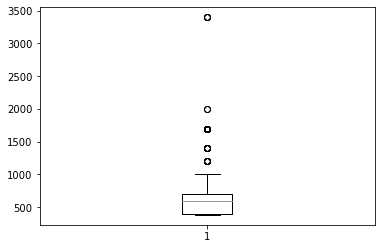

In [21]:
plt.boxplot(df_outliers['Sales'])
plt.show()

Insight : Outlier tidak dihapus untuk mengetahui produk produk apa yang menjadi outliers

In [22]:
# df.to_excel("SALES_DATA.xlsx", index = False)

## Data Visualization 

### 1. Produk apa yang paling laku terjual?

In [23]:
pd.crosstab(index = df['Product'], columns = 'Jumlah Terjual').sort_values('Jumlah Terjual', ascending = False)

col_0,Jumlah Terjual
Product,
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842


Insight : Produk yang paling banyak terjual adalah AAA Batteries (4-Pack), AA Batteries (4-Pack), USB-C Charging. 


**Rekomendasi:**

Untuk tim warehouse, perlu menambahkan kuota space untuk barang barang yang lebih laku seperti: 
	AAA Batteries (4-Pack), AA Batteries (4-Pack), USB-C Charging

Mengurangi stok barang yang kurang laku seperti:
	Vareebadd Phone, LG Washing Machines, LG Dryer

Sehingga pemanfaatan ruang gudang bisa lebih efisien. Karena produk adalah elektronik yang bisa rusak apabali terlalu lama di gudang, sehingga dengan efisiensi jumlah stok barang dapat mengurangi kerugian. 


## 2. Kapan orang paling banyak menggunakan dan membeli barang?

In [24]:
pd.crosstab(index = df['Time'], columns = 'Jumlah Terjual',values = df['Order ID'], aggfunc = 'count').sort_values('Jumlah Terjual', ascending = False)

col_0,Jumlah Terjual
Time,
Siang,66851
Pagi,57439
Malam,51151
Tengah Malam,10509


In [25]:
pd.crosstab(index = df['WeekEnd'], columns = 'Jumlah Terjual', values = df['Order ID'], aggfunc = 'count').sort_values('Jumlah Terjual', ascending = False)

col_0,Jumlah Terjual
WeekEnd,
No,132907
Yes,53043


In [29]:
WeekDays = 132907/5
WeekEnd = 53043/2
WeekDays

26581.4

In [31]:
WeekEnd

26521.5

In [38]:
pd.crosstab(index = df['Masa'], columns = 'Jumlah',values = df['Order ID'], aggfunc = 'count').sort_values('Jumlah', ascending = False)

col_0,Jumlah
Masa,
Akhir Bulan,63749
Tengah Bulan,61491
Awal Bulan,60710


Insight : Orang membeli paling banyak pada waktu Siang, dan bukan WeekEnd

Rekomendasi:
    
Promosi:
- Setiap minggunya : Untuk tim marketing waktu yang tepat melakukan promosi suatu barang yaitu pada hari kerja di siang hari, dari grafik kita dapat melihat banyak pengguna aktif menggunakan aplikasi , sehingga makin dilihat produk produk yang dipromosikan dan menaikan tingkat penjualan produk yang masih rendah quantity penjulannya.
- Setiap Tahun: Promosi dan diskon produk dilakukan pada saat akhir tahun dimana pada saat itu merupakan masa akhir tahun banyak hari libur, natal dan tahun baru sehingga pegawai pegawai mendapatkan bonus, dan disitulah promosi besar besar untuk e-commerce ini perlu masuk sehingga orang orang lebih mengenal e-commerce ini dan peningkatan penjual produk akan semakin naik. 

Promo dan Diskon:
- Promo dan diskon perlu dilakukan pada saat orang orang mengalami penurunan frekuensi pembelian barang yaitu pada Week End dan Tengah Malam agar adanya peningkatan dan kebiasaan orang membeli di e-commerce ini.


Source waktu yang tepat melakukan promosi :
https://blog.jejualan.com/waktu-promosi-terbaik/

Source kebiasaan orang belanja di Amerika:
https://www.voaindonesia.com/a/semakin-banyak-warga-as-belanja-online/1843041.html

Source data diskon dan tidak diskon:
https://media.neliti.com/media/publications/87381-ID-pengaruh-diskon-terhadap-minat-beli-sert.pdf


## 3. Di daerah mana orang paling sering menggunakan aplikasi?

In [32]:
pd.crosstab(index = df['City'], columns = 'Jumlah Pemesanan', values = df['Order ID'], aggfunc ='count').sort_values('Jumlah Pemesanan', ascending = False)

col_0,Jumlah Pemesanan
City,
San Francisco,44732
Los Angeles,29605
New York City,24876
Boston,19934
Atlanta,14881
Dallas,14820
Seattle,14732
Portland,12465
Austin,9905


## 4.Barang apa yang cocok ditawarkan oleh tim sales di setiap kotanya?

In [35]:
pd.crosstab(index = [df['City'],df['Product']], columns = 'Jumlah').sort_values('Jumlah', ascending = False)

col_0                                    Jumlah
City           Product                         
 San Francisco USB-C Charging Cable        5368
               Lightning Charging Cable    5174
               AAA Batteries (4-pack)      4932
               AA Batteries (4-pack)       4903
               Wired Headphones            4592
...                                         ...
 Dallas        LG Washing Machine            51
               LG Dryer                      44
 Portland      LG Dryer                      37
               LG Washing Machine            37
 Austin        LG Washing Machine            26

[171 rows x 1 columns]

**Rekomendasi:**
- Dari analisis data disetiap kota mengalami kemiripan barang apa yang paling laku dan tidak laku yaitu baterai AAA (4-Pack), namun untuk penjualan paling tertinggi berada di San Fransisco, sehingga perlu penambahan kerjasama dengan jasa pengiriman yang ada di San Fransisco agar dengan banyak pemintaan dapat terkirim sesuai jadwal tanpa ada keterlambatan.
- Untuk tim marketing masih perlu ditingkatkan promosi-promosi di kota lain seperti New York, Los Angeles yang masih memungkinkan penambahan pengguna e-commerce ini karena kita tahu New York dan Los Angeles adalah kota yang memiliki penduduk paling banyak di Amerika Serikat. 

Source jumlah penduduk di kota-kota Amerika Serikat:
https://id.wikipedia.org/wiki/Daftar_kota_di_Amerika_Serikat_menurut_jumlah_penduduk
https://id.wikipedia.org/wiki/Amerika_Serikat

## 5. Range Harga yang Paling Banyak dibeli?

In [39]:
pd.crosstab(index=df['Price Each'], columns = 'Quantity').sort_values('Quantity', ascending = False)

col_0,Quantity
Price Each,
11.95,21903
14.95,21658
2.99,20641
3.84,20577
11.99,18882
150.00,15549
99.99,13325
149.99,7507
700.00,6842


**Rekomendasi:**
- Pengguna lebih banyak membeli barang dengan harga di bawah 15 dollar, sehingga perlu ditambahkan jenis produk produk elektronik yang memiliki harga jual di bawah 15 dollar sehingga orang lebih merasa dimudahkan membeli barang menggunakan aplikasi ini.
- Perlu dibuat diskon atau promo untuk barang barang yang memiliki harga di atas 15 dollar sehingga jika masyarakat ingin membeli barang elektronik tidak perlu ke toko offline dan dapat langsung menggunakan aplikasi e-commerce ini.


============================================================================

**Before:** 
- Aplikasi masih belum banyak digunakan atau dikenal di kota kota besar di Amerika Serikat.

**After**
- Peningkatan penggunaan e-commerce kita di kota kota besar di Amerika Serikat

**Jika Perusahaan menggunakan Rekomendasi ini**

   **Pro :**
   
    - Efisien stock space
    - Masyarakat di kota besar lebih mengenal dan menggunakan E-commerce kita ini untuk membeli barang elektronik

   **cons :**
   
    - Perlu penambahan cost untuk promosi dan promo di kota kota besar.





### Kesimpulan:
1. Pengaturan jumlah stok sesuai dengan kebutuhan setiap kota, barang yang lebih laku akan meminimalisir  kerugian.
2. Promosi pada waktu yang tepat akan menambahkan peningkatan penjualan produk-produk, dan membuat konsumen terbiasa dan lebih mudah untuk membeli produk elektronik dengan e-commerce ini.
3. Diskon dan promo untuk barang barang dengan range harga diatas 15 dolar dan produk dengan penjualan yang masih rendah dapat meningkatkan penjualan produk tersebut.
4. Penambahan jenis jenis produk dengan range harga di bawah 15 dollar akan mempermudah pengguna mencari barang yang di inginkan dan akan membuat kebiasaan jika mereka mencari sesuatu barang elektronik dengan e-commerce kita ini.
5. Masih kurangnya pengguna di kota kota besar sehingga perlu lebih digencarkan lagi promosi promosi melalui social media dan alat promosi lain di kota kota besar.
